In [1]:
!pip install transformers
from transformers import BertTokenizer, BertModel
import pandas as pd
import numpy as np
import torch
import re;

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

import os
os.chdir("/content/drive/MyDrive/yelp_austin")
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
austin_checkin.csv  austin_review.csv  austin_user.csv	pytorchversion.pkl
austin_rest.csv     austin_tip.csv     logs		results


In [3]:
rev_df = pd.read_csv('austin_review.csv')

In [4]:
one_rest_df = rev_df[rev_df.business_id == "MGzro82Fi4LYvc86acoONQ"]

In [5]:
reviews = []
for review in one_rest_df.text:
  reviews += re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', review)
reviews = [r.strip() for r in reviews]

In [9]:
# Getting embeddings for the target
# word in all given contexts

# target_word_embeddings = []
# for text in reviews[:1000]:
#     tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(text, tokenizer)
#     list_token_embeddings = get_bert_embeddings(tokens_tensor, segments_tensors, model)
#     target_word_embeddings.append(list_token_embeddings)
#     break

In [ ]:
pip install sentence-transformers;

In [7]:
from sentence_transformers import SentenceTransformer

model2 = SentenceTransformer('bert-base-nli-mean-tokens');

In [8]:
sentence_embeddings = model2.encode(reviews[:5000])

In [9]:
sentence_embeddings.shape

(5000, 768)

In [10]:
from scipy.spatial.distance import pdist, squareform

In [13]:
pmat = squareform(pdist(sentence_embeddings))
np.fill_diagonal(pmat, np.inf)

In [20]:
i = 35
print(reviews[i])
print(min(pmat[i,:]), reviews[np.argmin(pmat[i,:])])

Perfection!! Outstanding food and experience - worth every minute you have to wait!!!
9.578955233324926 The food is more than worth the infamous wait and I have to say that I had an amazing time during my visit.


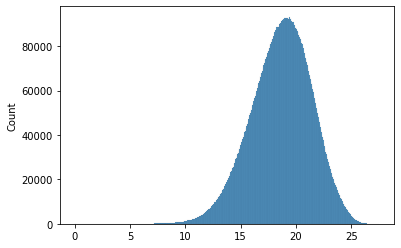

In [17]:
sns.histplot(pmat.flatten())

In [19]:
import umap
emb_umap = umap.UMAP().fit_transform(sentence_embeddings)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=emb_umap[:,0], y=emb_umap[:,1], s=1)

In [22]:
from sklearn.decomposition import PCA

In [23]:
emb_pca = PCA(n_components=2).fit_transform(sentence_embeddings)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


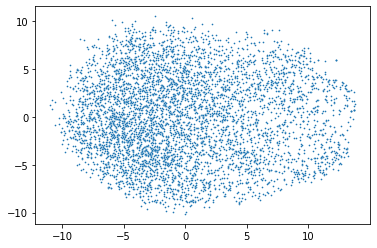

In [26]:
sns.scatterplot(emb_pca[:,0], emb_pca[:,1], s=3)